**VERİ İŞLEMLERİ**

In [2]:
import pandas as pd


Yerel kaynaktan veri okuma (dosyadan veri al)

In [3]:
data=pd.read_excel(r"C:\Users\ONUR\Desktop\Yeni klasör\data.xlsx")

In [4]:
type(data)

pandas.core.frame.DataFrame

EDA

In [7]:
data.head(8) #dataframe

,boyut,fiyat
0,80,125
1,85,130
2,90,140
3,95,153
4,100,162
5,103,167
6,108,172
7,110,203


In [8]:
data.fiyat 

0    125
1    130
2    140
3    153
4    162
5    167
6    172
7    203
Name: fiyat, dtype: int64

In [9]:
data["fiyat"]

0    125
1    130
2    140
3    153
4    162
5    167
6    172
7    203
Name: fiyat, dtype: int64

In [10]:
data.fiyat.value_counts()

125    1
130    1
140    1
153    1
162    1
167    1
172    1
203    1
Name: fiyat, dtype: int64

<AxesSubplot:ylabel='fiyat'>

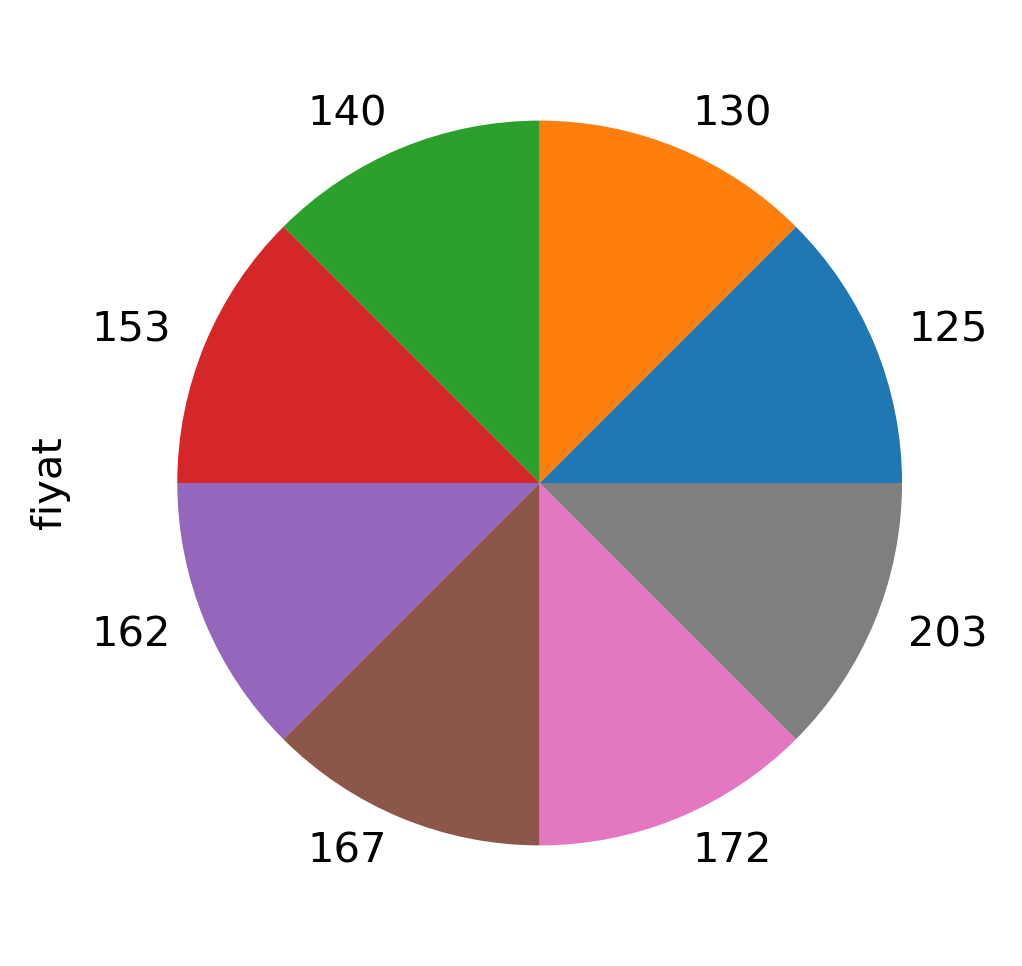

In [12]:
import matplotlib.pyplot as plt
plt.figure(dpi=300)
data.fiyat.value_counts().plot(kind="pie")

**URL den veri okuma**

In [15]:
data=pd.read_csv("https://raw.githubusercontent.com/dronursevli/mlrepo/main/emlak.csv",sep=";")

In [16]:
data.head(7)

,m2,fiyat
0,85,200
1,90,235
2,95,250
3,100,290
4,110,318
5,115,335
6,120,360


In [18]:
data.tail(3)

,m2,fiyat
7,130,400
8,145,445
9,150,460


In [19]:
type(data)

pandas.core.frame.DataFrame

In [20]:
data.shape

(10, 2)

In [21]:
data.columns

Index(['m2', 'fiyat'], dtype='object')

In [28]:
data.rename(columns={"m2":"genislik"},inplace=True)

In [29]:
data.columns

Index(['genislik', 'fiyat'], dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   genislik  10 non-null     int64
 1   fiyat     10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [31]:
data.describe()

,genislik,fiyat
count,10.000000,10.000000
mean,114.000000,329.300000
std,22.459841,88.200592
min,85.000000,200.000000
25%,96.250000,260.000000
50%,112.500000,326.500000
75%,127.500000,390.000000
max,150.000000,460.000000


In [32]:
data.corr()

,genislik,fiyat
genislik,1.00000,0.99435
fiyat,0.99435,1.00000


<AxesSubplot:>

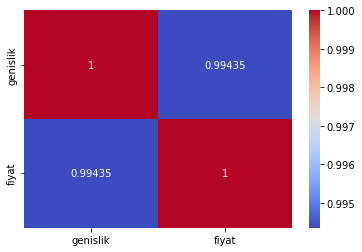

In [40]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,fmt="g",cmap="coolwarm")

In [41]:
X=data.genislik
y=data["fiyat"]

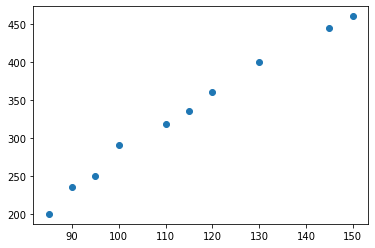

In [42]:
import matplotlib.pyplot as plt
#scatterplot
plt.plot(X, y,'o')

**LINEAR REGRESSION**

In [43]:
import numpy as np
# lineer regresyon doğrusunun m (eğim) ve b(kesen) değeri
m, b = np.polyfit(X, y, 1)

In [45]:
print(m)

3.9048458149779743


In [46]:
print(f"{round(m,2)}* X + {b}")

3.9* X + -115.85242290748906


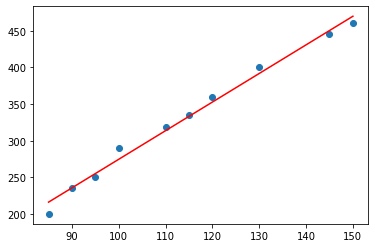

In [47]:
plt.plot(X, y,'o')
plt.plot(X, m*X+b, c="r")

**Seaborn regplot**

<AxesSubplot:xlabel='genislik', ylabel='fiyat'>

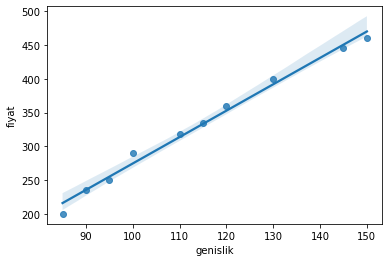

In [48]:
sns.regplot(x=X,y=y)

**Train test split**

![](https://miro.medium.com/max/1400/1*-8_kogvwmL1H6ooN1A1tsQ.png)

In [49]:
X.shape

(10,)

In [50]:
type(X)

pandas.core.series.Series

In [51]:
X=np.array(X).reshape(-1,1)
y=np.array(y).reshape(-1,1)

In [52]:
X.shape

(10, 1)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #default test size %25

**Model fit**

In [54]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
r2_score = lr.score(X_test,y_test)
print("%",r2_score*100)

% 99.72668716509834


In [57]:
s=np.array([256]).reshape(-1,1)
lr.predict(s)

array([[892.01668405]])

**SINIFLANDIRMA**

In [58]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [59]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [60]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [61]:
iris_dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [62]:
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
iris_dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=42)#%75 train %25 test 

In [65]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [66]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


In [67]:
# dataframe oluşturma
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)


In [68]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.6,1.4,0.2
1,5.2,4.1,1.5,0.1
2,5.8,2.7,5.1,1.9
3,6.0,3.4,4.5,1.6
4,6.7,3.1,4.7,1.5


**KNN classifier**

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [70]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
X_new = np.array([[5, 2.9, 1, 1.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [74]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


**Model değerlendirme**

In [75]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [76]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 1.00


In [77]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 1.00


**CONFUSION MATRIX**

![](https://www.researchgate.net/profile/Enoch-Opanin-Gyamfi-2/publication/319183193/figure/fig4/AS:668388829437953@1536367723057/Modified-Confusion-Matrix-Table-for-Accuracy-Prediction-of-24.ppm)

![](https://i.stack.imgur.com/OW5Lt.jpg)

In [79]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

In [80]:
print(cm)

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


<AxesSubplot:>

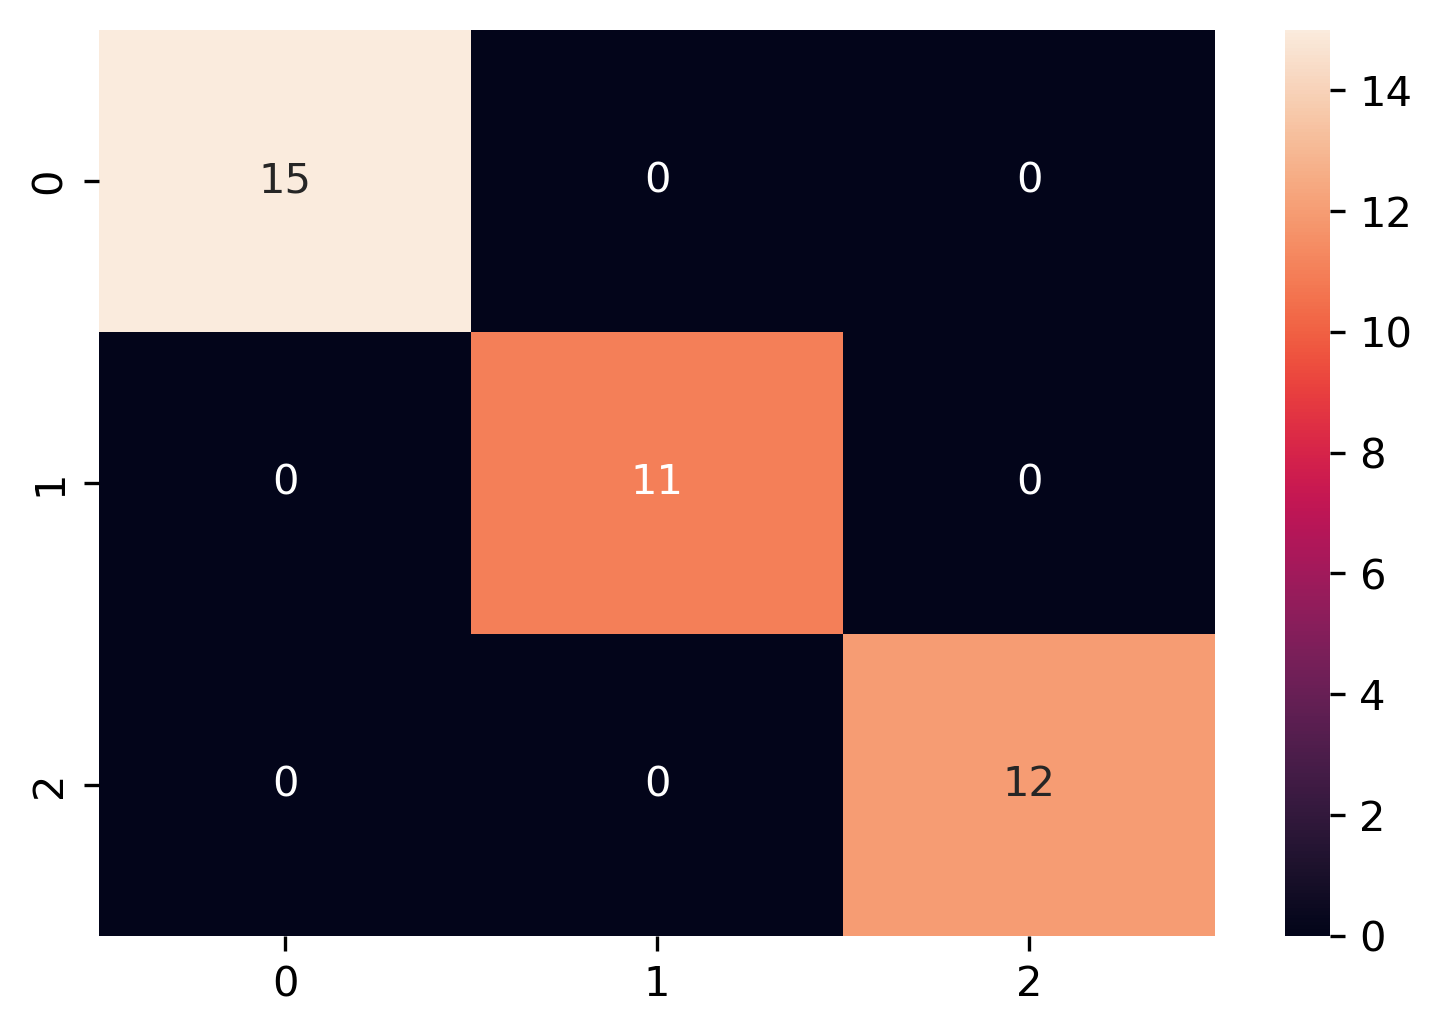

In [81]:
plt.figure(dpi=300)
sns.heatmap(cm,annot=True)

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



**K FOLD CROSS VALIDATION (K KAT ÇAPRAZ DOĞRULAMA)**

![](https://www.machinecurve.com/wp-content/uploads/2020/11/feed-3.jpg)

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [83]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [84]:
from sklearn.datasets import load_breast_cancer
breast=load_breast_cancer()
X=breast.data
y=breast.target

In [85]:
breast.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [87]:
rf = RandomForestClassifier(n_estimators=150)
cv = cross_validate(rf, X, y, cv=10)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.98245614 0.87719298 0.94736842 0.94736842 0.98245614 0.98245614
 0.96491228 0.98245614 0.94736842 1.        ]
0.9614035087719298


In [88]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
           "auc": make_scorer(roc_auc_score)}

In [89]:
scores = cross_validate(estimator=rf, X=X, y=y, cv=10, scoring=scoring)

In [90]:
scores

{'fit_time': array([0.22590637, 0.22686386, 0.22938609, 0.22287321, 0.24467754,
        0.23282719, 0.22642684, 0.23138618, 0.23250484, 0.22391224]),
 'score_time': array([0.01433849, 0.01495624, 0.0149951 , 0.01595592, 0.01396275,
        0.01595616, 0.01492739, 0.01598287, 0.01396275, 0.01499343]),
 'test_accuracy': array([0.98245614, 0.89473684, 0.94736842, 0.96491228, 1.        ,
        0.98245614, 0.98245614, 0.98245614, 0.98245614, 1.        ]),
 'test_precision': array([1.        , 0.89189189, 0.94594595, 0.94736842, 1.        ,
        1.        , 0.97297297, 0.97297297, 1.        , 1.        ]),
 'test_recall': array([0.97142857, 0.94285714, 0.97222222, 1.        , 1.        ,
        0.97222222, 1.        , 1.        , 0.97222222, 1.        ]),
 'test_f1_score': array([0.98550725, 0.91666667, 0.95890411, 0.97297297, 1.        ,
        0.98591549, 0.98630137, 0.98630137, 0.98591549, 1.        ]),
 'test_auc': array([0.98571429, 0.88051948, 0.93849206, 0.95238095, 1.        ,

In [91]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
sd=pd.DataFrame.from_dict(scores)
print(sd)

   fit_time  score_time  test_accuracy  test_precision  test_recall  \
0  0.225906    0.014338       0.982456        1.000000     0.971429   
1  0.226864    0.014956       0.894737        0.891892     0.942857   
2  0.229386    0.014995       0.947368        0.945946     0.972222   
3  0.222873    0.015956       0.964912        0.947368     1.000000   
4  0.244678    0.013963       1.000000        1.000000     1.000000   
5  0.232827    0.015956       0.982456        1.000000     0.972222   
6  0.226427    0.014927       0.982456        0.972973     1.000000   
7  0.231386    0.015983       0.982456        0.972973     1.000000   
8  0.232505    0.013963       0.982456        1.000000     0.972222   
9  0.223912    0.014993       1.000000        1.000000     1.000000   

   test_f1_score  test_auc  
0       0.985507  0.985714  
1       0.916667  0.880519  
2       0.958904  0.938492  
3       0.972973  0.952381  
4       1.000000  1.000000  
5       0.985915  0.986111  
6       0.98630

In [92]:
df=pd.read_csv("https://raw.githubusercontent.com/abhi060698/Breast-Cancer-UCI-Dataset/master/data.csv")

In [93]:
df.drop(["id"],axis=1,inplace=True)

In [94]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [95]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['diagnosis'] = le.fit_transform(df.diagnosis.values)

In [97]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
X=df.drop(["diagnosis"],axis=1)
y=df["diagnosis"]

In [ ]:
X

In [ ]:
y